

# **House Price prediction**

#**import Labraries**

In [303]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib
import os
import seaborn as sns
import plotly.express as px
matplotlib.rcParams["figure.figsize"] = (20,10)

# **Getting the data**



In [227]:
df1 = pd.read_csv("/content/train-chennai-sale.csv")
df1.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


#**Data cleaning**

In [228]:
df1.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [229]:
df1.shape

(7109, 22)

In [230]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

**Finding null values**

In [231]:
df1.isnull().sum ()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

**Filling the null values**

In [232]:
#null values are occur in N_BEDROOM and N_BATHROOM
#date datatype was wrong
#change room dtype to int

In [233]:
mode_bath=df1["N_BATHROOM"].mode()[0]
mode_bed=df1["N_BEDROOM"].mode()[0]

In [234]:
df1["N_BATHROOM"].fillna(mode_bath,inplace=True)
df1["N_BEDROOM"].fillna(mode_bed,inplace=True)

In [235]:
df1.isnull().sum ()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [236]:
df2 = df1.dropna()
df2.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [237]:
#changing the datatype
df2["DATE_BUILD"]=pd.to_datetime(df2["DATE_BUILD"])
df2["DATE_SALE"]=pd.to_datetime(df2["DATE_SALE"])
df2["N_BEDROOM"]=df2["N_BEDROOM"].astype(int)
df2["N_BATHROOM"]=df2["N_BATHROOM"].astype(int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [238]:
df2["HOUSE_AGE"] = df2["DATE_SALE"].dt.year-df2["DATE_BUILD"].dt.year


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [239]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7061 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7061 non-null   object        
 1   AREA           7061 non-null   object        
 2   INT_SQFT       7061 non-null   int64         
 3   DATE_SALE      7061 non-null   datetime64[ns]
 4   DIST_MAINROAD  7061 non-null   int64         
 5   N_BEDROOM      7061 non-null   int64         
 6   N_BATHROOM     7061 non-null   int64         
 7   N_ROOM         7061 non-null   int64         
 8   SALE_COND      7061 non-null   object        
 9   PARK_FACIL     7061 non-null   object        
 10  DATE_BUILD     7061 non-null   datetime64[ns]
 11  BUILDTYPE      7061 non-null   object        
 12  UTILITY_AVAIL  7061 non-null   object        
 13  STREET         7061 non-null   object        
 14  MZZONE         7061 non-null   object        
 15  QS_ROOMS       7061 n

In [240]:
df2['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

**Same place with speeling mistake**

In [241]:
df2['AREA'] = df2['AREA'].replace({'TNagar':'T Nagar','Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','Karapakam':'Karapakkam','Adyr':'Adyar','Ann Nagar':'Anna Nagar','Ana Nagar':'Anna Nagar','Velchery':'Velachery','KKNagar':'KK Nagar'})
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,2011-03-01,51,1,1,2,AdjLand,No,...,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000,49
7105,P10000,Velachery,1897,2004-08-04,52,3,2,5,Family,Yes,...,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480,9
7106,P09594,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,No,...,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410,28
7107,P06508,Karapakkam,787,2009-03-08,40,1,1,2,Partial,Yes,...,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000,32


In [242]:
df2['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [243]:
df2['PARK_FACIL'] = df2['PARK_FACIL'].replace({'Noo':'No'})
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30


In [244]:
df2['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [245]:
# Sale condition has spelling mistake
df2['SALE_COND'] = df2['SALE_COND'].replace({'Adj Land':'AdjLand','Ab Normal':'AbNormal','PartiaLl':'Partial','Partiall':'Partial','Adjland':'AdjLand'})
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30


In [246]:
df2['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [247]:
#creating new column for tolal price
df2['Total_price']= df2['REG_FEE'] + df2['COMMIS'] + df2['SALES_PRICE']
df2['Total_price']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        8124400
1       22781941
2       13672408
3       10063653
4        7717313
          ...   
7104     5668827
7105    11370222
7106     8835792
7107     9051448
7108    10405469
Name: Total_price, Length: 7061, dtype: int64

#**finding the ouliers and resolving them**

In [248]:
#outliers in sales price
print(df2['SALES_PRICE'].quantile(0.25))
print(df2['SALES_PRICE'].quantile(0.50))
print(df2['SALES_PRICE'].quantile(0.75))
print(df2['SALES_PRICE'].quantile(0.95))

8268875.0
10320700.0
12980150.0
18787680.0


In [249]:
df2['SALES_PRICE']= np.where(df2['SALES_PRICE']>12993900.0,12993900,df2['SALES_PRICE'])
df2['SALES_PRICE']= np.where(df2['SALES_PRICE']<8272100.0,8272100.0,df2['SALES_PRICE'])
print(df2['SALES_PRICE'].skew())

0.10105060781587188


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



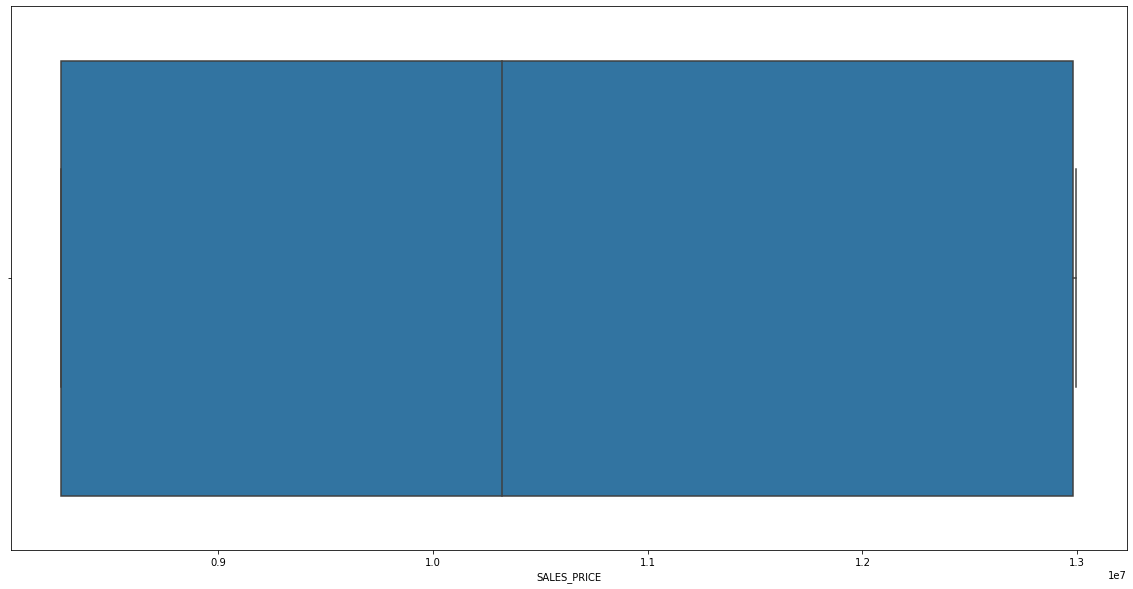

In [250]:
sns.boxplot(x='SALES_PRICE',data=df2)

In [253]:
print(df2['INT_SQFT'].skew())

-0.034144556393431995


In [254]:
def remove_bhk_outliers(df2):
    exclude_indices = np.array([])
    for AREA, AREA_df2 in df2.groupby('AREA'):
        N_BEDROOM_stats = {}
        for N_BEDROOM, N_BEDROOM_df2 in AREA_df2.groupby('N_BEDROOM'):
            N_BEDROOM_stats[N_BEDROOM] = {
                'mean': np.mean(N_BEDROOM_df2.INT_SQFT),
                'std': np.std(N_BEDROOM_df2.INT_SQFT),
                'count': N_BEDROOM_df2.shape[0]
            }
        for N_BEDROOM, N_BEDROOM_df in AREA_df2.groupby('N_BEDROOM'):
            stats = N_BEDROOM_stats.get(N_BEDROOM-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, N_BEDROOM_df[N_BEDROOM_df.INT_SQFT<(stats['mean'])].index.values)
    return df2.drop(exclude_indices,axis='index')
remove_bhk_outliers(df2)
df2.shape

(7061, 24)

In [310]:
Q1=df2['HOUSE_AGE'].quantile(0.25)
Q2=df2['HOUSE_AGE'].quantile(0.50)
Q3=df2['HOUSE_AGE'].quantile(0.75)
Q4=df2['HOUSE_AGE'].quantile(0.95)

In [311]:
IQR= Q3-Q1
IQR

20.0

In [312]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit,upper_limit

(-16.0, 64.0)

In [315]:
df2[(df2['HOUSE_AGE']<lower_limit) | (df2['HOUSE_AGE']>upper_limit)]
df2_no_outlier = df2[(df2['HOUSE_AGE']<lower_limit) & (df2['HOUSE_AGE']<upper_limit)]
df2_no_outlier

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE,Total_price


In [316]:
Q1=df2['INT_SQFT'].quantile(0.25)
Q2=df2['INT_SQFT'].quantile(0.50)
Q3=df2['INT_SQFT'].quantile(0.75)
Q4=df2['INT_SQFT'].quantile(0.95)

In [317]:
IQR= Q3-Q1
IQR

753.0

In [318]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit,upper_limit

(-138.5, 2873.5)

In [326]:
df2[(df2['INT_SQFT']<lower_limit) | (df2['INT_SQFT']>upper_limit)]
df2_no_outlier = df2[(df2['INT_SQFT']<lower_limit) & (df2['INT_SQFT']<upper_limit)]
df2_no_outlier

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE,Total_price


In [320]:
#correlation
#corrmatrix = df2.corr()
#corrmatrix

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE,Total_price
AREA,1.000000,0.420979,-0.015302,0.362740,0.222890,0.280152,-0.008236,0.009274,-0.007251,0.004427,0.000253,0.003203,0.005708,0.074490,0.219913,-0.001557,0.115201,-0.010540
INT_SQFT,0.420979,1.000000,-0.002897,0.694150,0.436598,0.879128,-0.002124,0.004927,-0.005700,0.020248,-0.007776,0.010008,0.013514,0.627189,0.551886,0.589519,-0.007303,0.598160
DIST_MAINROAD,-0.015302,-0.002897,1.000000,-0.001875,0.002365,0.002602,0.004440,-0.009576,-0.010014,0.003239,-0.030939,0.000903,-0.017313,0.011279,0.010204,0.015775,0.001852,0.018065
N_BEDROOM,0.362740,0.694150,-0.001875,1.000000,0.755998,0.840493,0.009128,-0.009390,-0.004200,0.015692,-0.006305,0.016168,0.014282,0.456790,0.431186,0.351293,-0.082109,0.342910
N_BATHROOM,0.222890,0.436598,0.002365,0.755998,1.000000,0.569903,0.002381,-0.013885,-0.007058,0.013635,-0.011012,0.012354,0.007989,0.262472,0.258357,0.130131,-0.042298,0.120615
N_ROOM,0.280152,0.879128,0.002602,0.840493,0.569903,1.000000,0.009449,-0.000853,-0.006746,0.016812,-0.006755,0.016022,0.015459,0.631681,0.533932,0.598238,-0.060494,0.610098
SALE_COND,-0.008236,-0.002124,0.004440,0.009128,0.002381,0.009449,1.000000,-0.013629,-0.011630,0.004483,-0.014077,-0.005067,-0.008107,-0.031391,-0.036216,-0.022705,-0.004834,-0.030762
PARK_FACIL,0.009274,0.004927,-0.009576,-0.009390,-0.013885,-0.000853,-0.013629,1.000000,-0.004645,-0.008122,-0.011304,-0.000887,-0.009634,0.140340,0.097411,0.135441,-0.004675,0.147573
BUILDTYPE,-0.007251,-0.005700,-0.010014,-0.004200,-0.007058,-0.006746,-0.011630,-0.004645,1.000000,0.002165,0.008880,0.000615,0.005226,-0.331154,-0.232515,-0.310414,0.003707,-0.362154
QS_ROOMS,0.004427,0.020248,0.003239,0.015692,0.013635,0.016812,0.004483,-0.008122,0.002165,1.000000,0.009129,0.009061,0.517741,0.020651,0.009449,0.026092,0.015573,0.022216


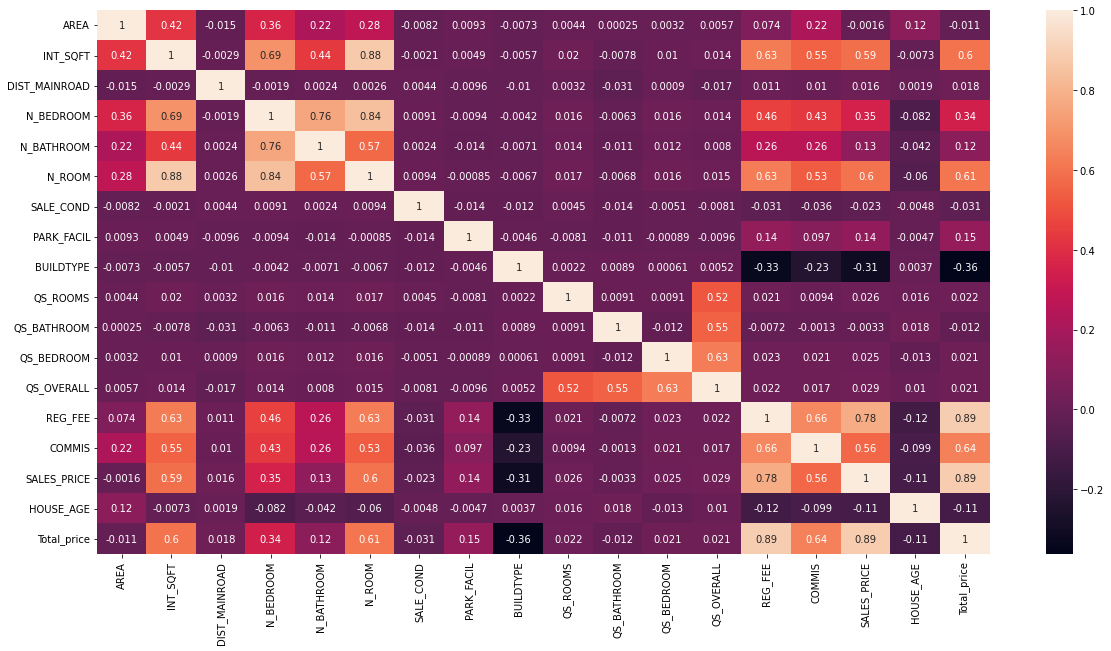

In [306]:
#eat = sns.heatmap(corrmatrix,annot=True)
#heat

In [325]:
df2.shape

(7061, 24)

#**Plotting**

In [257]:
fig1=px.histogram(df2,x="AREA",color="AREA",title="<b>AREA wise distribution of data<br>"+"")
fig1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



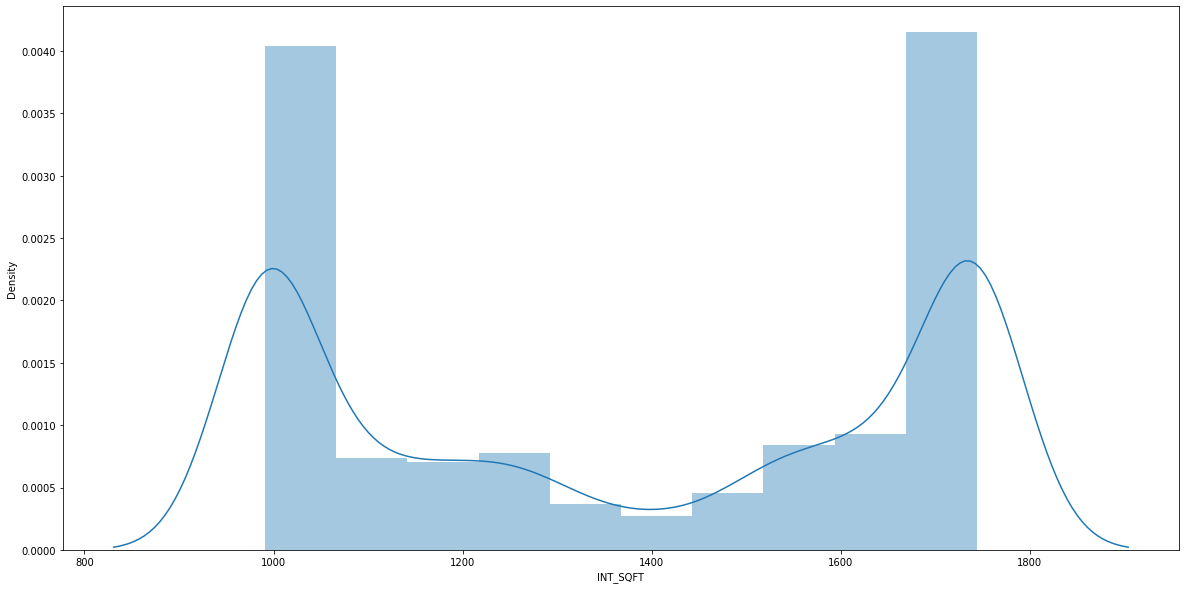

In [258]:
fig2=sns.distplot(df2.INT_SQFT)
fig2

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



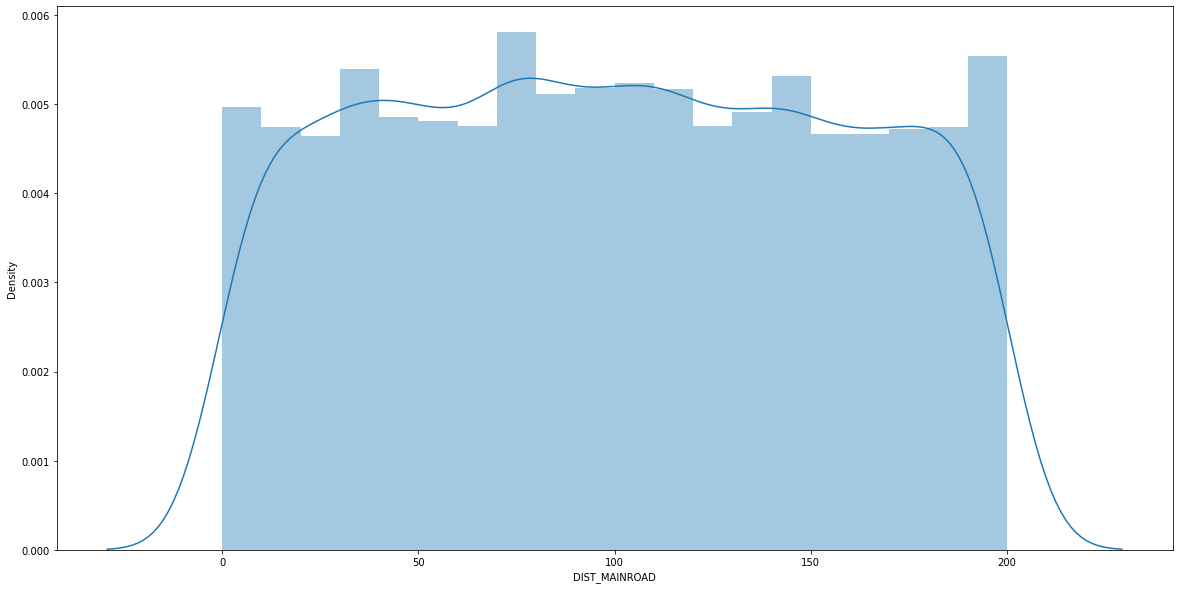

In [259]:
fig3=sns.distplot(df2.DIST_MAINROAD)
fig3

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



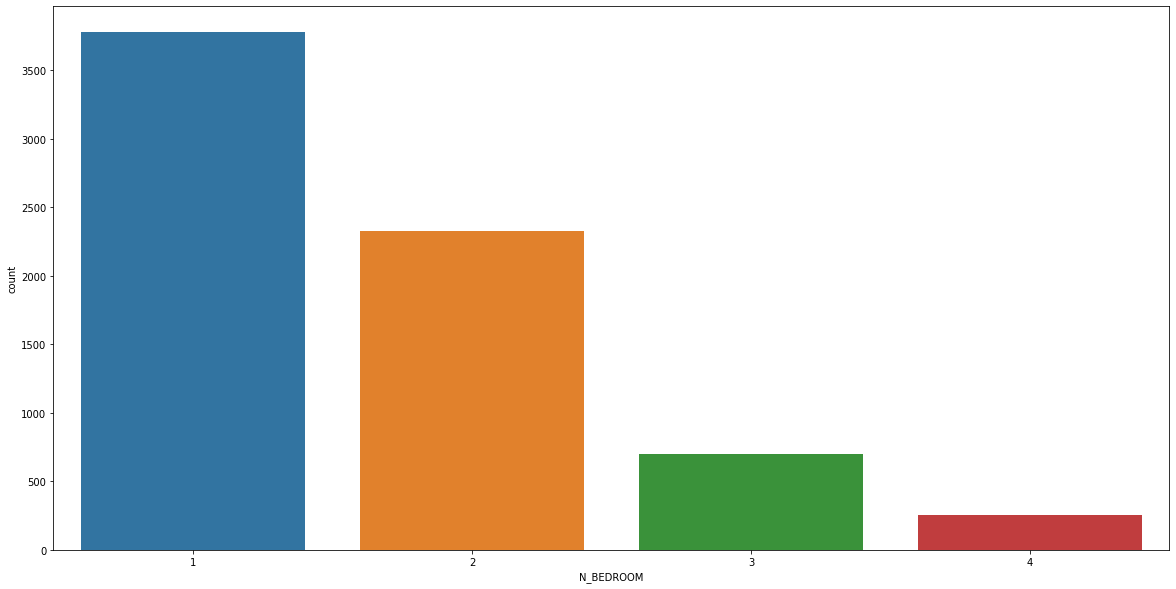

In [260]:
fig4=sns.countplot(df2.N_BEDROOM)
fig4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



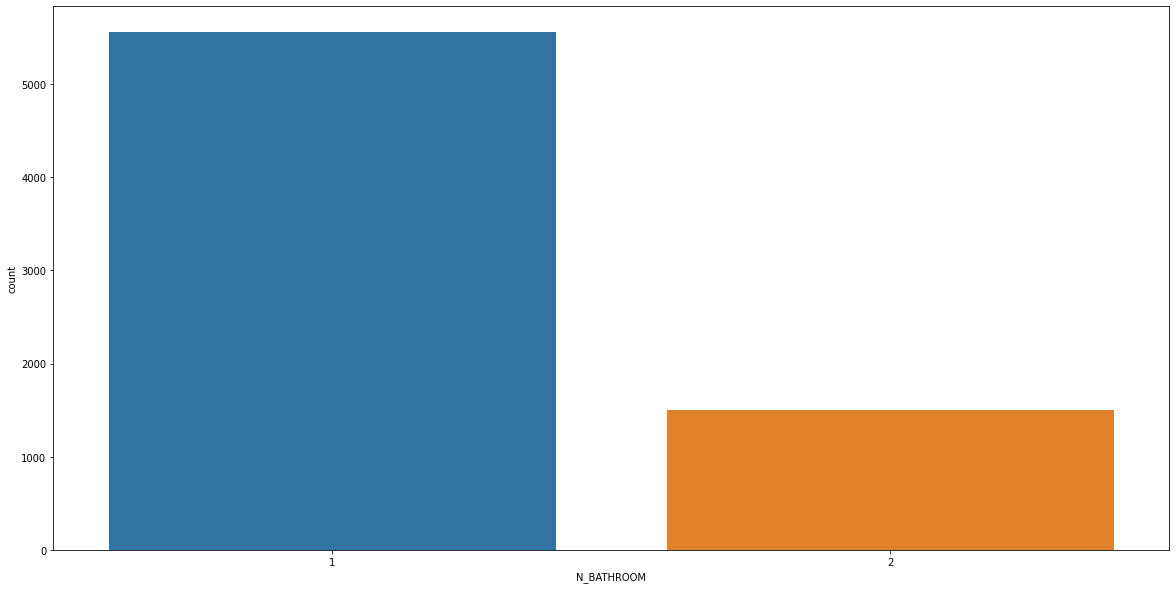

In [261]:
fig5=sns.countplot(df2.N_BATHROOM)
fig5

In [262]:
value = df2["SALE_COND"].value_counts()
name= df2["SALE_COND"].unique()
fig6= px.pie(df2,values=value,names=name,color=value,title="<b>Distribution of sale")
fig6

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



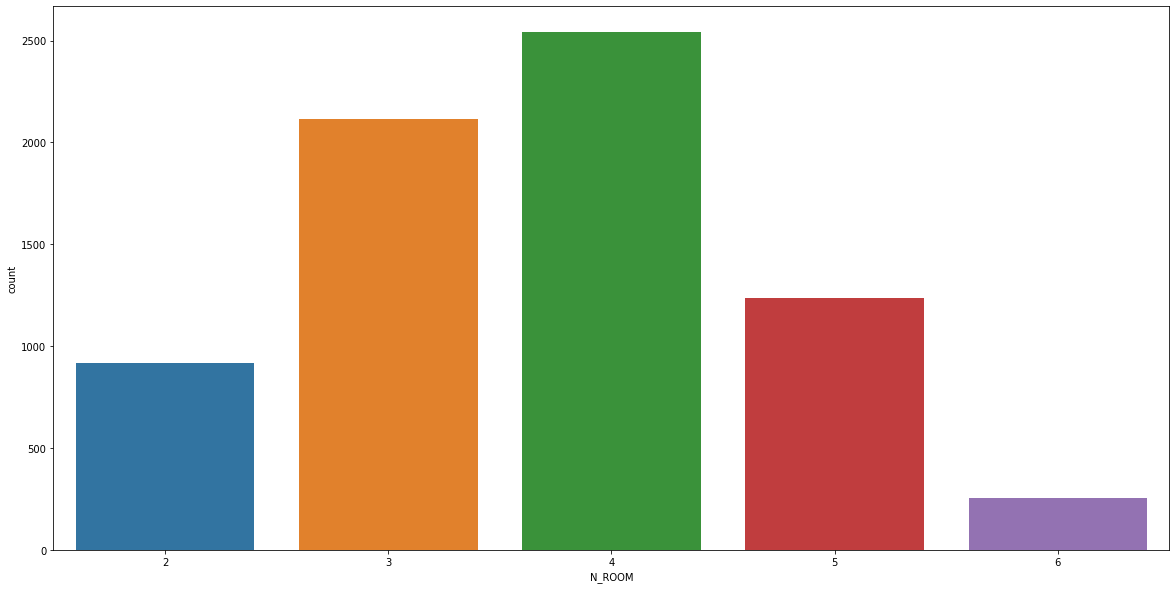

In [263]:
fig7=sns.countplot(df2.N_ROOM)
fig7

In [264]:
value = df2["PARK_FACIL"].value_counts()
name= df2["PARK_FACIL"].unique()
fig6= px.pie(df2,values=value,names=name,color=value,title="<b>Distribution of parking facility")
fig6

In [265]:
fig7=px.histogram(df2,x="HOUSE_AGE",color="HOUSE_AGE",title="<b>distribution of data as pre house age<br>"+"")
fig7

#**Feature and targets**

In [266]:
#creating the data frame for area and sales price
x=pd.DataFrame(df2.groupby("AREA")["Total_price"].mean())
y=df2["AREA"].unique()
y=sorted(y)
 

data={"Area":y,"Average_price":x["Total_price"]}
temp = pd.DataFrame(data)
temp.sort_values('Average_price',inplace= True)

In [267]:
fig1=px.bar(temp,x="Area",y="Average_price",color="Area",title="<b>AREA vs Average_price<br>")
fig1

**Interpretation:**
       There is a relationship between Area and average price

In [268]:
fig2=px.scatter(df2,x="INT_SQFT",y="Total_price",color="INT_SQFT",title="<b>sq.ft vs sales price<br>")
fig2

In [269]:
#creating the data frame for bedroom and total price
x2=pd.DataFrame(df2.groupby("N_BEDROOM")["Total_price"].mean())
y2=df2["N_BEDROOM"].unique()
y2=sorted(y2)
 

data2={"N_BEDROOM":y2,"Average_price":x2["Total_price"]}
temp2 = pd.DataFrame(data2)
temp2

,N_BEDROOM,Average_price
N_BEDROOM,,
1,1,1.021732e+07
2,2,1.238871e+07
3,3,1.314589e+07
4,4,1.527997e+07


In [270]:
fig4=px.bar(temp2,x="N_BEDROOM",y="Average_price",color="N_BEDROOM",title="<b>bedroom vs Average_price<br>")
fig4

In [271]:
#creating the data frame for bathroom and sales price
x3=pd.DataFrame(df2.groupby("N_BATHROOM")["Total_price"].mean())
y3=df2["N_BATHROOM"].unique()
y3=sorted(y3)
 

data3={"N_BATHROOM":y3,"Average_price":x3["Total_price"]}
temp3 = pd.DataFrame(data3)
temp3

,N_BATHROOM,Average_price
N_BATHROOM,,
1,1,1.115868e+07
2,2,1.232071e+07


In [272]:
fig5=px.bar(temp3,x="N_BATHROOM",y="Average_price",color="N_BATHROOM",title="<b>bathroom vs Average_price<br>")
fig5

In [273]:
x4=pd.DataFrame(df2.groupby("N_ROOM")["Total_price"].mean())
y4=df2["N_ROOM"].unique()
y4=sorted(y4)
 

data4={"N_ROOM":y4,"Average_price":x4["Total_price"]}
temp4 = pd.DataFrame(data4)
temp4

,N_ROOM,Average_price
N_ROOM,,
2,2,7.311850e+06
3,3,9.698487e+06
4,4,1.225616e+07
5,5,1.483646e+07
6,6,1.527997e+07


In [274]:
fig6=px.bar(temp4,x="N_ROOM",y="Average_price",color="N_ROOM",title="<b>room vs Average_price<br>")
fig6

In [275]:
a= [df2.loc[(df2.DIST_MAINROAD>i) & (df2.DIST_MAINROAD<(i+25)),'Total_price'].mean() for i in range(0,200,25)]
a

[11417416.258302582,
 11355667.68119266,
 11363685.728351127,
 11225578.22497188,
 11307453.68150685,
 11592332.415584415,
 11591459.745891277,
 11516065.714459294]

Text(0.5, 1.0, 'DIST_MAINROAD vs SALES PREIVE')

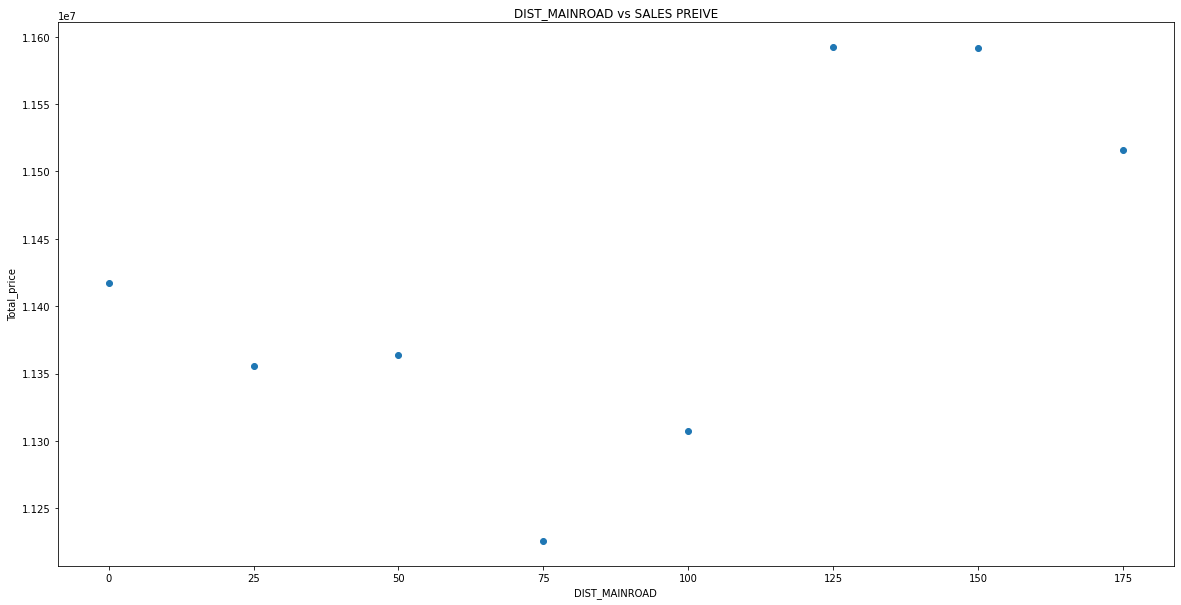

In [276]:
import matplotlib.pyplot as plt
plt.scatter(x=list(range(0,200,25)),y=a)
plt.xlabel('DIST_MAINROAD')
plt.ylabel('Total_price')
plt.title('DIST_MAINROAD vs SALES PREIVE')

#**Machine learning model**

In [293]:
data=df2
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7061 entries, 0 to 7108
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7061 non-null   object        
 1   AREA           7061 non-null   int64         
 2   INT_SQFT       7061 non-null   int64         
 3   DATE_SALE      7061 non-null   datetime64[ns]
 4   DIST_MAINROAD  7061 non-null   int64         
 5   N_BEDROOM      7061 non-null   int64         
 6   N_BATHROOM     7061 non-null   int64         
 7   N_ROOM         7061 non-null   int64         
 8   SALE_COND      7061 non-null   int64         
 9   PARK_FACIL     7061 non-null   int64         
 10  DATE_BUILD     7061 non-null   datetime64[ns]
 11  BUILDTYPE      7061 non-null   int64         
 12  UTILITY_AVAIL  7061 non-null   object        
 13  STREET         7061 non-null   object        
 14  MZZONE         7061 non-null   object        
 15  QS_ROOMS       7061 n

In [294]:
#Encoding catagorical data
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [295]:
#Label starts from 0 in alphabetical order.
data["SALE_COND"]=label_encoder.fit_transform(data["SALE_COND"])
data["AREA"]=label_encoder.fit_transform(data["AREA"])
data["PARK_FACIL"]=label_encoder.fit_transform(data["PARK_FACIL"])
data["BUILDTYPE"]=label_encoder.fit_transform(data["BUILDTYPE"])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [296]:
data.head()


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE,Total_price
0,P03210,4,1004,2011-04-05,131,1,1,3,0,1,...,A,4.0,3.9,4.9,4.330,380000,144400,8272100.0,44,8124400
1,P09411,1,1744,2006-12-19,26,2,1,5,0,0,...,RH,4.9,4.2,2.5,3.765,760122,304049,12993900.0,11,22781941
2,P01812,0,991,2012-04-02,70,1,1,3,0,1,...,RL,4.1,3.8,2.2,3.090,421094,92114,12993900.0,20,13672408
3,P05346,6,1744,2010-03-13,14,3,2,5,2,0,...,I,4.7,3.9,3.6,4.010,356321,77042,9630290.0,22,10063653
4,P06210,4,1226,2009-05-10,84,1,1,3,0,1,...,C,3.0,2.5,4.1,3.290,237000,74063,8272100.0,30,7717313


#**Linear Regression**

In [281]:
x=data[['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','HOUSE_AGE']].values
y=data['Total_price'].values

In [282]:
from sklearn.model_selection import train_test_split

In [283]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)
len(x_train)
len(x_test)

1413

In [284]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train,y_train)
clf.predict(x_test)
y_test


array([ 9975882,  9938410,  7869632, ..., 11161821,  5454280, 17383027])

In [286]:
clf.score(x_test,y_test)

0.5098449661997819

In [297]:
# assigning cross valitation for better model score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.50984497, 0.52489081, 0.52682575, 0.51815464, 0.53454614])

#**Decision Tree**

In [329]:
x=data[['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','HOUSE_AGE']].values
y=data['Total_price'].values

In [288]:
from sklearn.model_selection import train_test_split

In [289]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)
len(x_train)
len(x_test)

1413

In [291]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
model.predict(x_test)
y_test


array([ 9975882,  9938410,  7869632, ..., 11161821,  5454280, 17383027])

In [292]:
model.score(x_test,y_test)

0.0

#**SVM**

In [330]:
x=data[['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','HOUSE_AGE']].values
y=data['Total_price'].values

In [331]:
from sklearn.model_selection import train_test_split

In [332]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)
len(x_train)
len(x_test)

1413

In [333]:
from sklearn.svm import SVC

In [337]:
model = SVC()
model.fit(x_train,y_train)


SVC()

In [ ]:
model.score(x_test,y_test)